# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
def fill_age(row):
    if pd.isnull(row['Age']):
        similar_rows = df[(df['Sex'] == row['Sex']) & 
                          (df['SibSp'] == row['SibSp']) & 
                          (df['Parch'] == row['Parch']) &
                          (~df['Age'].isnull())]
        if not similar_rows.empty:
            return similar_rows['Age'].median()
    return row['Age']
df['Age'] = df.apply(fill_age, axis=1)

In [8]:
df['Age'].isnull().sum()

7

In [9]:
df = df.dropna(subset=['Age'])

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelencoder = LabelEncoder()

In [13]:
df.drop(columns = 'Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [14]:
df['Sex_encoded'] = labelencoder.fit_transform(df['Sex'])
df['Tickets_encoded'] = labelencoder.fit_transform(df['Ticket'])
df.drop(columns = 'Ticket', inplace = True)

C:\Users\YAJUR\AppData\Local\Temp\ipykernel_6008\1877223547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex_encoded'] = labelencoder.fit_transform(df['Sex'])
C:\Users\YAJUR\AppData\Local\Temp\ipykernel_6008\1877223547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tickets_encoded'] = labelencoder.fit_transform(df['Ticket'])
C:\Users\YAJUR\AppData\Local\Temp\ipykernel_6008\1877223547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Tickets_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,523
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0,595
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,668
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0,49
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,1,101
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,0,14
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,23.4500,NaN,S,0,674
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,1,8


In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Tickets_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,523
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0,595
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,668
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0,49
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,1,101
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,0,14
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,23.4500,NaN,S,0,674
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,1,8


In [17]:
import nltk
import re

In [18]:
# Assuming you have imported pandas as pd and loaded your dataset into a DataFrame called df

# Group names by cabin
names_by_cabin = df.groupby('Cabin')['Name'].apply(list).to_dict()

# Filter out cabins with more than one person
shared_cabins = {cabin: names for cabin, names in names_by_cabin.items() if len(names) > 1}

# Convert the dictionary values to lists
shared_cabins = list(shared_cabins.values())

print("Passengers grouped by cabin:", shared_cabins)

Passengers grouped by cabin: [['Hippach, Miss. Jean Gertrude', 'Hippach, Mrs. Louis Albert (Ida Sophia Fischer)'], ['Dick, Mr. Albert Adrian', 'Dick, Mrs. Albert Adrian (Vera Gillespie)'], ['Crosby, Miss. Harriet R', 'Crosby, Capt. Edward Gifford'], ['Icard, Miss. Amelie', 'Stone, Mrs. George Nelson (Martha Evelyn)'], ['Aubart, Mme. Leontine Pauline', 'Sagesser, Mlle. Emma'], ['Bishop, Mrs. Dickinson H (Helen Walton)', 'Bishop, Mr. Dickinson H'], ['Madill, Miss. Georgette Alexandra', 'Allen, Miss. Elisabeth Walton'], ['Cardeza, Mr. Thomas Drake Martinez', 'Carlsson, Mr. Frans Olof'], ['Ryerson, Miss. Emily Borie', 'Ryerson, Miss. Susan Parker "Suzette"'], ['Baxter, Mr. Quigg Edmond', 'Baxter, Mrs. James (Helene DeLaudeniere Chaput)'], ['Cherry, Miss. Gladys', 'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)'], ['Carter, Mr. William Ernest', 'Carter, Miss. Lucile Polk', 'Carter, Mrs. William Ernest (Lucile Polk)', 'Carter, Master. William Thornton II'], ['Futrelle, Mrs. Jacques

In [19]:
import re

# Function to extract the name
def extract_name(name):
    match = re.search(r'(?:Mrs\. |Mr\. )([^()]+)', name)
    if match:
        return match.group(1).strip()
    return None

# List to store couples
couples = []

# List to store indexes of couples in the DataFrame
couple_indexes_df = []

# Iterate through each cabin group
for cabin_group in shared_cabins:
    # Dictionary to store Mr. and Mrs. names
    mr_names = {}
    mrs_names = {}
    
    # Iterate through each passenger index and passenger in the cabin group
    for passenger_index, passenger in enumerate(cabin_group):
        # Extract the name
        name = extract_name(passenger)
        
        # Check if the passenger is Mr. or Mrs.
        if "Mr." in passenger:
            mr_names[name] = passenger
        elif "Mrs." in passenger:
            mrs_names[name] = passenger
    
    # Find couples where Mr. name matches Mrs. name
    for mr_name, mr_passenger in mr_names.items():
        if mr_name in mrs_names:
            mrs_passenger = mrs_names[mr_name]
            couples.append((mr_passenger, mrs_passenger))
            # Store indexes of couples in the DataFrame
            mr_index_df = df[df['Name'] == mr_passenger].index.values[0]
            mrs_index_df = df[df['Name'] == mrs_passenger].index.values[0]
            couple_indexes_df.append((mr_index_df, mrs_index_df))
            
# Print couples
for couple in couples:
    print("Couple found:", couple)

# Print indexes of couples in the DataFrame
print("Indexes of couples in the DataFrame:", couple_indexes_df)

Couple found: ('Dick, Mr. Albert Adrian', 'Dick, Mrs. Albert Adrian (Vera Gillespie)')
Couple found: ('Bishop, Mr. Dickinson H', 'Bishop, Mrs. Dickinson H (Helen Walton)')
Couple found: ('Carter, Mr. William Ernest', 'Carter, Mrs. William Ernest (Lucile Polk)')
Couple found: ('Futrelle, Mr. Jacques Heath', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)')
Couple found: ('Taylor, Mr. Elmer Zebley', 'Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)')
Couple found: ('Penasco y Castellana, Mr. Victor de Satode', 'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)')
Couple found: ('Thayer, Mr. John Borland', 'Thayer, Mrs. John Borland (Marian Longstreth Morris)')
Couple found: ('Harris, Mr. Henry Birkhardt', 'Harris, Mrs. Henry Birkhardt (Irene Wallach)')
Couple found: ('Goldenberg, Mr. Samuel L', 'Goldenberg, Mrs. Samuel L (Edwiga Grabowska)')
Couple found: ('Hoyt, Mr. Frederick Maxfield', 'Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)')
Couple found: ('Har

In [20]:
df['Married'] = False

# Set 'Married' column to True for the indexes of couples
for couple_index in couple_indexes_df:
    df.loc[couple_index, 'Married'] = True

# Display the DataFrame with the new 'Married' column
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

C:\Users\YAJUR\AppData\Local\Temp\ipykernel_6008\2023915005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married'] = False


In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Tickets_encoded,Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,523,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0,595,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,668,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0,49,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1,472,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,1,101,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,0,14,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,23.4500,NaN,S,0,674,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,1,8,False


In [22]:
print((df['Married'] == True).sum())

30


In [23]:
import matplotlib.pyplot as plt

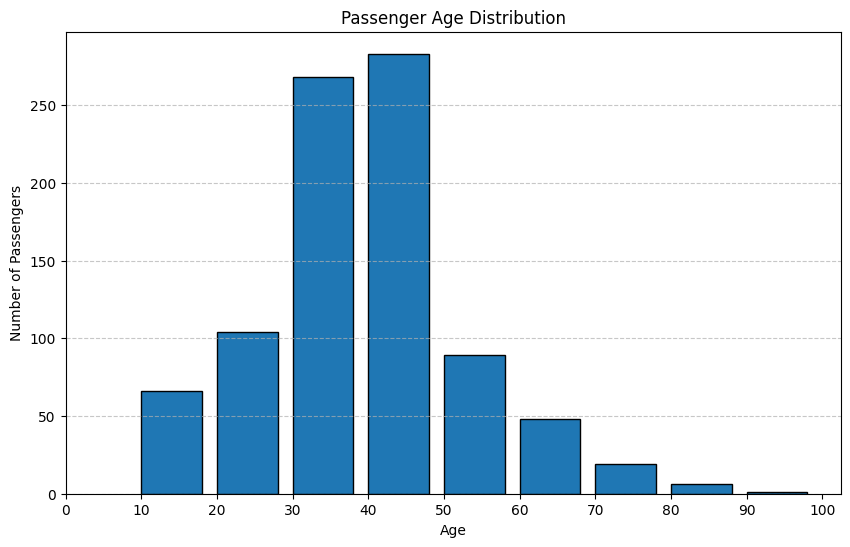

In [24]:
import matplotlib.pyplot as plt

# Define age ranges
age_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Group ages into age ranges
age_groups = df['Age'].apply(lambda age: next((i for i, r in enumerate(age_ranges) if age < r), len(age_ranges)))

# Count passengers in each age range
age_counts = age_groups.value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index * 10, age_counts.values, width=8, align='edge', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Passenger Age Distribution')
plt.xticks(range(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
def are_related(name1, name2):
    # Split the names into last name and title (if present)
    last_name1 = name1.split(',')[0].strip()
    last_name2 = name2.split(',')[0].strip()

    # Check if the last names match
    return last_name1 == last_name2

# Test the function
name1 = 'Crosby, Miss. Harriet R'
name2 = 'Crosby, Capt. Edward Gifford'
print(are_related(name1, name2))  # Output: True

True


In [26]:
# Remove couples from shared_cabin list
for mr_index, mrs_index in couple_indexes_df:
    # Find and remove the cabin group if any couple is found
    for cabin_group in shared_cabins:
        if df.loc[mr_index, 'Name'] in cabin_group or df.loc[mrs_index, 'Name'] in cabin_group:
            shared_cabins.remove(cabin_group)

# Verify that couples are removed from shared_cabin list
print("Shared cabins after removing couples:")
for cabin_group in shared_cabins:
    print(cabin_group)

Shared cabins after removing couples:
['Hippach, Miss. Jean Gertrude', 'Hippach, Mrs. Louis Albert (Ida Sophia Fischer)']
['Crosby, Miss. Harriet R', 'Crosby, Capt. Edward Gifford']
['Icard, Miss. Amelie', 'Stone, Mrs. George Nelson (Martha Evelyn)']
['Aubart, Mme. Leontine Pauline', 'Sagesser, Mlle. Emma']
['Madill, Miss. Georgette Alexandra', 'Allen, Miss. Elisabeth Walton']
['Cardeza, Mr. Thomas Drake Martinez', 'Carlsson, Mr. Frans Olof']
['Ryerson, Miss. Emily Borie', 'Ryerson, Miss. Susan Parker "Suzette"']
['Baxter, Mr. Quigg Edmond', 'Baxter, Mrs. James (Helene DeLaudeniere Chaput)']
['Cherry, Miss. Gladys', 'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)']
['Partner, Mr. Austen', 'Klaber, Mr. Herman']
['Graham, Mrs. William Thompson (Edith Junkins)', 'Shutes, Miss. Elizabeth W']
['Pears, Mrs. Thomas (Edith Wearne)', 'Pears, Mr. Thomas Clinton']
['Allison, Miss. Helen Loraine', 'Allison, Master. Hudson Trevor', 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)']
['Fort

In [27]:
from itertools import combinations

def extract_last_name(name):
    # Use regular expression to extract last name
    match = re.search(r'([A-Za-z]+),', name)
    if match:
        return match.group(1)
    else:
        return None

def find_family_relations(shared_cabins):
    family_relations = []
    for cabin_group in shared_cabins:
        for pair in combinations(cabin_group, 2):
            last_names = [extract_last_name(person.split('(')[0].strip()) for person in pair]
            if last_names[0] == last_names[1]:
                family_relations.append(list(pair))  # Convert tuple to list before appending
    return family_relations
# Print family relations
family_relations = find_family_relations(shared_cabins)

# Print family relations with full names
for relation in family_relations:
    print(relation)

['Hippach, Miss. Jean Gertrude', 'Hippach, Mrs. Louis Albert (Ida Sophia Fischer)']
['Crosby, Miss. Harriet R', 'Crosby, Capt. Edward Gifford']
['Ryerson, Miss. Emily Borie', 'Ryerson, Miss. Susan Parker "Suzette"']
['Baxter, Mr. Quigg Edmond', 'Baxter, Mrs. James (Helene DeLaudeniere Chaput)']
['Pears, Mrs. Thomas (Edith Wearne)', 'Pears, Mr. Thomas Clinton']
['Allison, Miss. Helen Loraine', 'Allison, Master. Hudson Trevor']
['Allison, Miss. Helen Loraine', 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)']
['Allison, Master. Hudson Trevor', 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)']
['Fortune, Mr. Charles Alexander', 'Fortune, Miss. Mabel Helen']
['Fortune, Mr. Charles Alexander', 'Fortune, Miss. Alice Elizabeth']
['Fortune, Mr. Charles Alexander', 'Fortune, Mr. Mark']
['Fortune, Miss. Mabel Helen', 'Fortune, Miss. Alice Elizabeth']
['Fortune, Miss. Mabel Helen', 'Fortune, Mr. Mark']
['Fortune, Miss. Alice Elizabeth', 'Fortune, Mr. Mark']
['Minahan, Dr. William Edward', 'Mina

In [28]:
df['Family Relation'] = False
for names in family_relations:
    for name in names:
        df.loc[df['Name'] == name, 'Family Relation'] = True
df

C:\Users\YAJUR\AppData\Local\Temp\ipykernel_6008\2042883921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family Relation'] = False


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Tickets_encoded,Married,Family Relation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,523,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0,595,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,668,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0,49,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1,472,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,1,101,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,0,14,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,23.4500,NaN,S,0,674,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,1,8,False,False


In [29]:
print(((df['Family Relation']) == True).sum())

34


In [30]:
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])

C:\Users\YAJUR\AppData\Local\Temp\ipykernel_6008\2896652692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = labelencoder.fit_transform(df['Embarked'])


In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Tickets_encoded,Married,Family Relation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,2,1,523,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,0,0,595,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,2,0,668,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,2,0,49,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,2,1,472,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,2,1,101,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,2,0,14,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,23.4500,NaN,2,0,674,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,0,1,8,False,False


In [32]:
df['Cabin'] = labelencoder.fit_transform(df['Cabin'])

C:\Users\YAJUR\AppData\Local\Temp\ipykernel_6008\4265720296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin'] = labelencoder.fit_transform(df['Cabin'])


In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Tickets_encoded,Married,Family Relation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,147,2,1,523,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,81,0,0,595,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,147,2,0,668,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,55,2,0,49,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,147,2,1,472,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,147,2,1,101,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,30,2,0,14,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,23.4500,147,2,0,674,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,60,0,1,8,False,False


In [34]:
df.drop(columns = ['Sex'], inplace = True)

C:\Users\YAJUR\AppData\Local\Temp\ipykernel_6008\1583840477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Sex'], inplace = True)


In [35]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Tickets_encoded,Married,Family Relation
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,147,2,1,523,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,81,0,0,595,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,147,2,0,668,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,55,2,0,49,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,147,2,1,472,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,147,2,1,101,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,30,2,0,14,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",23.0,1,2,23.4500,147,2,0,674,False,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,60,0,1,8,False,False


In [36]:
df['Married'] = labelencoder.fit_transform(df['Married'])
df['Family Relation'] = labelencoder.fit_transform(df['Family Relation'])

C:\Users\YAJUR\AppData\Local\Temp\ipykernel_6008\609585407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married'] = labelencoder.fit_transform(df['Married'])
C:\Users\YAJUR\AppData\Local\Temp\ipykernel_6008\609585407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family Relation'] = labelencoder.fit_transform(df['Family Relation'])


In [37]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Tickets_encoded,Married,Family Relation
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,147,2,1,523,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,81,0,0,595,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,147,2,0,668,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,55,2,0,49,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,147,2,1,472,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,147,2,1,101,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,30,2,0,14,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",23.0,1,2,23.4500,147,2,0,674,0,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,60,0,1,8,0,0


# Model Building

## Logistic Regression

In [38]:
df_new = df.copy()
dfNew_Wnames = df.copy()

In [39]:
df_new.drop(columns = 'Name', inplace = True)

In [40]:
df_new.drop(columns = 'PassengerId', inplace = True)

In [41]:
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Tickets_encoded,Married,Family Relation
0,0,3,22.0,1,0,7.2500,147,2,1,523,0,0
1,1,1,38.0,1,0,71.2833,81,0,0,595,0,0
2,1,3,26.0,0,0,7.9250,147,2,0,668,0,0
3,1,1,35.0,1,0,53.1000,55,2,0,49,1,0
4,0,3,35.0,0,0,8.0500,147,2,1,472,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,147,2,1,101,0,0
887,1,1,19.0,0,0,30.0000,30,2,0,14,0,0
888,0,3,23.0,1,2,23.4500,147,2,0,674,0,0
889,1,1,26.0,0,0,30.0000,60,0,1,8,0,0


In [42]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
df_shuffled = df_new.sample(frac=1, random_state=40)
train_ratio = 0.9
test_ratio = 0.1
train_idx = int(train_ratio * len(df_shuffled))
train_df = df_shuffled.iloc[:train_idx]
test_df = df_shuffled.iloc[train_idx:]

In [45]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Tickets_encoded,Married,Family Relation
809,1,1,33.0,1,0,53.1000,137,2,0,51,1,0
26,0,3,30.0,0,0,7.2250,147,0,1,179,0,0
867,0,1,31.0,0,0,50.4958,6,2,1,589,0,0
856,1,1,45.0,1,1,164.8667,147,2,0,453,0,0
42,0,3,30.0,0,0,7.8958,147,0,1,391,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
734,0,2,23.0,0,0,13.0000,147,2,1,119,0,0
883,0,2,28.0,0,0,10.5000,147,2,1,565,0,0
607,1,1,27.0,0,0,30.5000,147,2,1,50,0,0
342,0,2,28.0,0,0,13.0000,147,2,1,159,0,0


In [46]:
train_df['Survived'].unique()

array([1, 0], dtype=int64)

In [47]:
x_train, y_train = train_df.iloc[:,1:], train_df.iloc[:,0]
x_test, y_test = test_df.iloc[:,1:], test_df.iloc[:,0]

In [48]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((795, 11), (795,), (89, 11), (89,))

In [49]:
unique_values, counts = np.unique(y_train, return_counts=True)

print("Unique values in y_train:", unique_values)
print("Counts of unique values:", counts)

Unique values in y_train: [0 1]
Counts of unique values: [489 306]


In [112]:
logistic_model_1_titanic = LogisticRegression()
logistic_model_1_titanic.fit(x_train, y_train)
print("Accuracy:",logistic_model_1_titanic.score(x_train, y_train))

Accuracy: 0.7949685534591195


C:\Users\YAJUR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_model_1_titanic.predict(x_test), target_names = ['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.77      0.96      0.86        53
    Survived       0.91      0.58      0.71        36

    accuracy                           0.81        89
   macro avg       0.84      0.77      0.78        89
weighted avg       0.83      0.81      0.80        89



## Shallow Neural Network

In [58]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
nlp = spacy.load("en_core_web_md")
def preprocess_name(name):
    doc = nlp(name.lower())
    tokens = [token.text for token in doc if not token.is_punct]
    return " ".join(tokens)
dfNew_Wnames['Name'] = dfNew_Wnames['Name'].astype(str)
dfNew_Wnames['Processed_Name'] = dfNew_Wnames['Name'].apply(preprocess_name)
def name_to_vector(name):
    tokens = name.split()
    word_vectors = [token.vector for token in nlp(" ".join(tokens))]
    return np.mean(word_vectors, axis=0)
dfNew_Wnames['Vector'] = dfNew_Wnames['Processed_Name'].apply(name_to_vector)
similarity_matrix = cosine_similarity(np.stack(dfNew_Wnames['Vector'].to_numpy()))
name_index_1 = 0
name_index_2 = 1
similarity_score = similarity_matrix[name_index_1, name_index_2]

In [62]:
dfNew_Wnames.drop(columns = ['Name Vector', 'Processed_Name', 'Vector'], inplace = True)
dfNew_Wnames

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_encoded,Tickets_encoded,Married,Family Relation
0,1,0,3,[-7.02275038e-01 -1.03564978e-01 1.05549991e-...,22.0,1,0,7.2500,147,2,1,523,0,0
1,2,1,1,[-0.9933543 -0.10135172 -0.33238563 0.416881...,38.0,1,0,71.2833,81,0,0,595,0,0
2,3,1,3,[ 0.3851 0.96000004 0.02063833 -1.067900...,26.0,0,0,7.9250,147,2,0,668,0,0
3,4,1,1,[-0.70882994 0.27270144 -1.4795786 0.380867...,35.0,1,0,53.1000,55,2,0,49,1,0
4,5,0,3,[-3.35471487e+00 -2.83123016e+00 -1.29380500e+...,35.0,0,0,8.0500,147,2,1,472,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,[ 2.21046671e-01 5.52133322e-01 -5.15100002e-...,27.0,0,0,13.0000,147,2,1,101,0,0
887,888,1,1,[-0.689195 -1.520975 0.59370625 -1.332025...,19.0,0,0,30.0000,30,2,0,14,0,0
888,889,0,3,[-1.20470405e+00 -4.92339998e-01 -9.54512954e-...,23.0,1,2,23.4500,147,2,0,674,0,0
889,890,1,1,[-1.0314225e+00 -1.8995750e-01 -1.6768225e+00 ...,26.0,0,0,30.0000,60,0,1,8,0,0


In [63]:
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [92]:
shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(4, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))
checkpoint = ModelCheckpoint('shallow_nn', save_best_only = True)
shallow_nn.compile(optimizer = 'RMSProp', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [93]:
shallow_nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 48        
                                                                 
 batch_normalization_13 (Ba  (None, 4)                 16        
 tchNormalization)                                               
                                                                 
 dense_21 (Dense)            (None, 2)                 10        
                                                                 
 batch_normalization_14 (Ba  (None, 2)                 8         
 tchNormalization)                                               
                                                                 
 dense_22 (Dense)            (None, 1)                 3         
                                                                 
Total params: 85 (340.00 Byte)
Trainable params: 73 (2

In [94]:
shallow_nn.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, callbacks = checkpoint)

Epoch 1/10
15/25 [=================>............] - ETA: 0s - loss: 0.8855 - accuracy: 0.4688 INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


25/25 [==============================] - 3s 67ms/step - loss: 0.8688 - accuracy: 0.4843 - val_loss: 3.2509 - val_accuracy: 0.5955
Epoch 2/10
15/25 [=================>............] - ETA: 0s - loss: 0.7971 - accuracy: 0.5396INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


25/25 [==============================] - 1s 50ms/step - loss: 0.7864 - accuracy: 0.5497 - val_loss: 2.3845 - val_accuracy: 0.5955
Epoch 3/10
19/25 [=====================>........] - ETA: 0s - loss: 0.7099 - accuracy: 0.6414INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


25/25 [==============================] - 1s 46ms/step - loss: 0.7022 - accuracy: 0.6541 - val_loss: 1.8682 - val_accuracy: 0.6292
Epoch 4/10
17/25 [===================>..........] - ETA: 0s - loss: 0.6626 - accuracy: 0.6691INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


25/25 [==============================] - 1s 48ms/step - loss: 0.6539 - accuracy: 0.6918 - val_loss: 1.4405 - val_accuracy: 0.6517
Epoch 5/10
20/25 [=======================>......] - ETA: 0s - loss: 0.6534 - accuracy: 0.7031INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


25/25 [==============================] - 1s 42ms/step - loss: 0.6493 - accuracy: 0.7019 - val_loss: 1.1270 - val_accuracy: 0.6517
Epoch 6/10
18/25 [====================>.........] - ETA: 0s - loss: 0.6356 - accuracy: 0.7118INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


25/25 [==============================] - 1s 47ms/step - loss: 0.6420 - accuracy: 0.7082 - val_loss: 0.9375 - val_accuracy: 0.6629
Epoch 7/10
21/25 [========================>.....] - ETA: 0s - loss: 0.6110 - accuracy: 0.7217INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


25/25 [==============================] - 1s 44ms/step - loss: 0.6163 - accuracy: 0.7132 - val_loss: 0.8003 - val_accuracy: 0.6742
Epoch 8/10
19/25 [=====================>........] - ETA: 0s - loss: 0.6117 - accuracy: 0.7336INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


25/25 [==============================] - 1s 46ms/step - loss: 0.6238 - accuracy: 0.7082 - val_loss: 0.6828 - val_accuracy: 0.7079
Epoch 9/10
17/25 [===================>..........] - ETA: 0s - loss: 0.6155 - accuracy: 0.7004INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


25/25 [==============================] - 1s 44ms/step - loss: 0.6105 - accuracy: 0.7006 - val_loss: 0.6440 - val_accuracy: 0.7191
Epoch 10/10
17/25 [===================>..........] - ETA: 0s - loss: 0.6055 - accuracy: 0.7206INFO:tensorflow:Assets written to: shallow_nn\assets


INFO:tensorflow:Assets written to: shallow_nn\assets


25/25 [==============================] - 1s 41ms/step - loss: 0.6040 - accuracy: 0.7182 - val_loss: 0.6195 - val_accuracy: 0.7079


In [96]:
def neural_net_pred(model,x):
    return (shallow_nn.predict(x).flatten() > 0.5).astype(int)
neural_net_pred(shallow_nn, x_test)

3/3 [==============================] - 0s 3ms/step


array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0])

In [97]:
print(classification_report(y_test, neural_net_pred(shallow_nn, x_test), target_names = ['Not Survived','Survived']))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

Not Survived       0.68      0.96      0.80        53
    Survived       0.86      0.33      0.48        36

    accuracy                           0.71        89
   macro avg       0.77      0.65      0.64        89
weighted avg       0.75      0.71      0.67        89



## KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy:", knn.score(x_train, y_train))

Accuracy: 0.8251572327044026


## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifer
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

ImportError: cannot import name 'RandomForestClassifer' from 'sklearn.ensemble' (C:\Users\YAJUR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\__init__.py)